In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

In [4]:
# import pandas as pd
# dataset_id = {
#     "heart_disease" : 145,
#     "chronic_kidney_disease" : 336,
#     "risk_factor_prediction_ckd" : 857,
#     "breast_cancer" : 451,
#     "diabetes_usa" : 296,
#     "early_diabetes": 529,
#     "maternal_health_risk" : 863,
#     "liver" : 46,
#     "obesity" : 544
# }

# for name, id in dataset_id.items():
#     dataset = fetch_ucirepo(id=id)
#     df = dataset.data.original  # Use 'cleaned' if needed

#     # Save to CSV locally
#     filename = f"{name}.csv"
#     df.to_csv(filename, index=False)
#     print(f"Saved {name} dataset as {filename}")

In [3]:
!pip install azure-storage-blob pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 406.9/406.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 10.1 MB/s eta 0:00:00


In [4]:
from azure.storage.blob import BlobServiceClient
import pandas as pd
import io

In [ ]:
# Define your Azure Storage Account details
STORAGE_ACCOUNT_NAME = "<my storqage account name>"
STORAGE_ACCOUNT_KEY = "<my account key>"
CONTAINER_NAME = "<my container name>"

# Create a connection string
connection_string = f"DefaultEndpointsProtocol=https;AccountName={STORAGE_ACCOUNT_NAME};AccountKey={STORAGE_ACCOUNT_KEY};EndpointSuffix=core.windows.net"

# Connect to the blob service
blob_service_client = BlobServiceClient.from_connection_string(connection_string)


In [6]:
# List all blobs (files) in the container
container_client = blob_service_client.get_container_client(CONTAINER_NAME)
blob_list = container_client.list_blobs()

print("Files in Blob Storage:")
for blob in blob_list:
    print(blob.name)


Files in Blob Storage:
breast_cancer.csv
chronic_kidney_disease.csv
diabetes_usa.csv
early_diabetes.csv
heart_disease.csv
liver.csv
maternal_health_risk.csv
obesity.csv


## Breast Cancer

In [7]:
#breat cancer
blob_client = container_client.get_blob_client("breast_cancer.csv")

# Download blob data
downloaded_blob = blob_client.download_blob()
csv_data = downloaded_blob.readall()

# Convert to pandas DataFrame
df_breastCancer = pd.read_csv(io.StringIO(csv_data.decode('utf-8')))
print(df_breastCancer.head(10))


   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   
5   49  22.854458       92    3.226  0.732087   6.8317    13.679750  10.31760   
6   89  22.700000       77    4.690  0.890787   6.9640     5.589865  12.93610   
7   76  23.800000      118    6.470  1.883201   4.3110    13.251320   5.10420   
8   73  22.000000       97    3.350  0.801543   4.4700    10.358725   6.28445   
9   75  23.000000       83    4.952  1.013839  17.1270    11.578990   7.09130   

      MCP.1  Classification  
0   417.114               1  
1   468.786               1  
2   554.697       

In [8]:
#checking nan values
print(df_breastCancer.isna().sum())

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64


In [9]:
df_breastCancer.drop_duplicates(inplace=True)

## Checking the skewness and normalizing the data


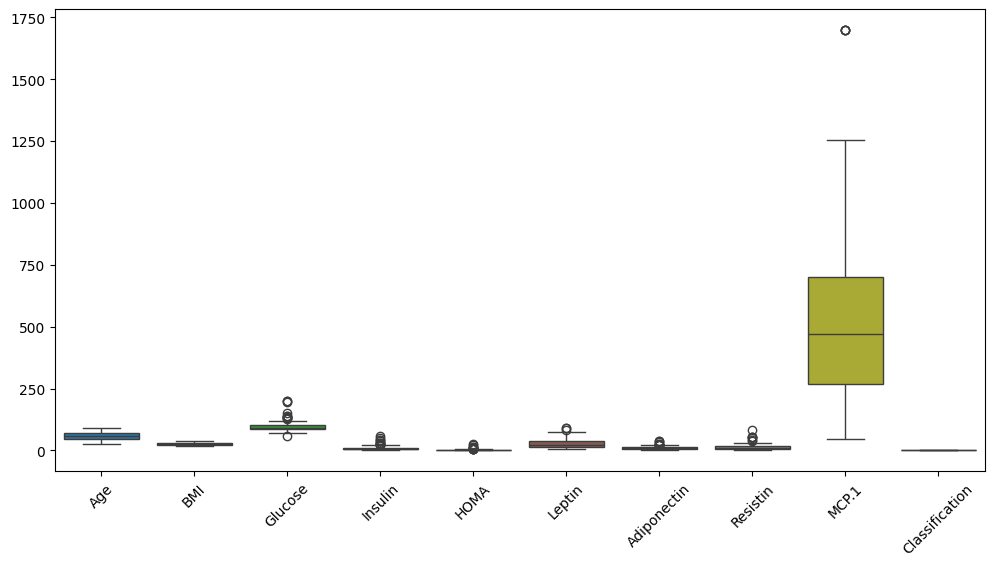

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_breastCancer)
plt.xticks(rotation=45)
plt.show()

In [11]:
#normalizing some features:
import numpy as np

df_breastCancer['MCP.1'] = np.log1p(df_breastCancer['MCP.1'])
df_breastCancer['Insulin'] = np.log1p(df_breastCancer['Insulin'])
print(df_breastCancer['MCP.1'])

0      6.035754
1      6.152277
2      6.320223
3      6.834346
4      6.652760
         ...   
111    5.595566
112    5.802602
113    5.752731
114    5.974979
115    4.511848
Name: MCP.1, Length: 116, dtype: float64


In [12]:
from scipy.stats import skew
print(df_breastCancer['MCP.1'].skew())

-0.5129520962079838


In [13]:
from scipy.stats import boxcox
df_breastCancer['MCP.1'], _ = boxcox(df_breastCancer['MCP.1'] + 1)

In [26]:
print(df_breastCancer['MCP.1'].skew())

-0.006831314822481881


In [14]:
print(df_breastCancer['Insulin'].skew())

0.9704792850895773


In [15]:
df_breastCancer['Insulin'], _ = boxcox(df_breastCancer['Insulin'] + 1)
print(df_breastCancer['Insulin'].skew())

0.08985001616072288


In [16]:
skew_values = df_breastCancer.skew().sort_values(ascending=False)
print(skew_values)

HOMA              3.812087
Glucose           2.593305
Resistin          2.577429
Adiponectin       1.817765
Leptin            1.309536
BMI               0.170152
Insulin           0.089850
Age               0.017832
MCP.1            -0.006831
Classification   -0.210748
dtype: float64


In [17]:
from scipy.stats import boxcox
import numpy as np

skewed_cols = ['Glucose', 'Leptin', 'HOMA', 'Adiponectin' , 'Resistin']

for col in skewed_cols:
    if (df_breastCancer[col] > 0).all():
        df_breastCancer[col], _ = boxcox(df_breastCancer[col])
    else:
        from sklearn.preprocessing import PowerTransformer
        pt = PowerTransformer(method='yeo-johnson')
        df_breastCancer[col] = pt.fit_transform(df_breastCancer[[col]])

print(df_breastCancer[skewed_cols].skew())


Glucose       -0.131235
Leptin         0.004261
HOMA           0.117326
Adiponectin   -0.000177
Resistin       0.023984
dtype: float64


In [18]:
from sklearn.model_selection import train_test_split

X = df_breastCancer.drop(columns=['Classification'])
y = df_breastCancer['Classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
#baseline model with LR
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

LR = LogisticRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {lr_accuracy:.4f}')

Logistic Regression Accuracy: 0.7241


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree model
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {dt_accuracy:.4f}')

Decision Tree Accuracy: 0.4483


In [21]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')

Random Forest Accuracy: 0.7586


In [22]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f'Gradient Boosting Accuracy: {gb_accuracy:.4f}')


Gradient Boosting Accuracy: 0.7241


In [23]:
importances = RF.feature_importances_
feature_names = X_train.columns
sorted(zip(importances, feature_names), reverse=True)

[(np.float64(0.20501846799201995), 'Glucose'),
 (np.float64(0.18218546473046418), 'Age'),
 (np.float64(0.10670387223439673), 'BMI'),
 (np.float64(0.09204744005632182), 'Adiponectin'),
 (np.float64(0.09136772284215494), 'Leptin'),
 (np.float64(0.0893283008309524), 'Resistin'),
 (np.float64(0.08805492903381373), 'HOMA'),
 (np.float64(0.07820617592321681), 'Insulin'),
 (np.float64(0.06708762635665934), 'MCP.1')]

In [24]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)

# print("Best parameters:", grid_search.best_params_)
# print("Best accuracy:", grid_search.best_score_)


In [25]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {svm_accuracy:.4f}')

SVM Accuracy: 0.4828


<ipython-input-26-ce24e4527395>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy_scores, palette=['blue', 'green', 'red', 'purple', 'orange'])


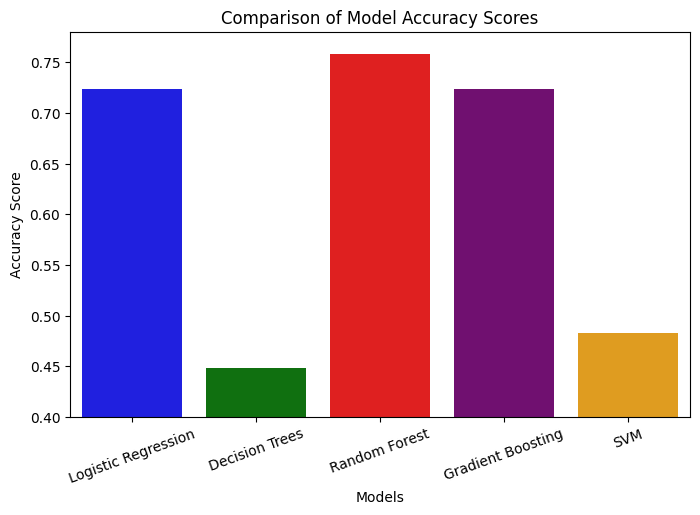

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'Gradient Boosting', 'SVM']
accuracy_scores = [lr_accuracy, dt_accuracy, rf_accuracy, gb_accuracy, svm_accuracy]  # Fixing duplicate values
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracy_scores, palette=['blue', 'green', 'red', 'purple', 'orange'])

plt.ylim(0.4, 0.78)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Comparison of Model Accuracy Scores")
plt.xticks(rotation=20)

plt.show()

##Kidney diseases

In [27]:
blob_client = container_client.get_blob_client("chronic_kidney_disease.csv")

# Download blob data
downloaded_blob_kidney = blob_client.download_blob()
csv_data_kidney = downloaded_blob_kidney.readall()

# Convert to pandas DataFrame
df_kidneydiseases = pd.read_csv(io.StringIO(csv_data_kidney.decode('utf-8')))
print(df_kidneydiseases.head(10))

    age     bp     sg   al   su       rbc        pc         pcc          ba  \
0  48.0   80.0  1.020  1.0  0.0       NaN    normal  notpresent  notpresent   
1   7.0   50.0  1.020  4.0  0.0       NaN    normal  notpresent  notpresent   
2  62.0   80.0  1.010  2.0  3.0    normal    normal  notpresent  notpresent   
3  48.0   70.0  1.005  4.0  0.0    normal  abnormal     present  notpresent   
4  51.0   80.0  1.010  2.0  0.0    normal    normal  notpresent  notpresent   
5  60.0   90.0  1.015  3.0  0.0       NaN       NaN  notpresent  notpresent   
6  68.0   70.0  1.010  0.0  0.0       NaN    normal  notpresent  notpresent   
7  24.0    NaN  1.015  2.0  4.0    normal  abnormal  notpresent  notpresent   
8  52.0  100.0  1.015  3.0  0.0    normal  abnormal     present  notpresent   
9  53.0   90.0  1.020  2.0  0.0  abnormal  abnormal     present  notpresent   

     bgr  ...   pcv     wbcc  rbcc  htn   dm  cad  appet   pe  ane class  
0  121.0  ...  44.0   7800.0   5.2  yes  yes   no   goo

In [28]:
print(df_kidneydiseases.isna().sum())

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64


In [29]:
# Filling numerical columns with the mean
num_cols = ['age', 'bp', 'sg' , 'al' , 'su' , 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']
df_kidneydiseases[num_cols] = df_kidneydiseases[num_cols].fillna(df_kidneydiseases[num_cols].mean())

# Filling categorical columns with the mode (most frequent value)
cat_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
df_kidneydiseases[cat_cols] = df_kidneydiseases[cat_cols].fillna(df_kidneydiseases[cat_cols].mode().iloc[0])

In [30]:
print(df_kidneydiseases.isna().sum())

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64


In [31]:
#checking the skewness
df_skew = df_kidneydiseases.select_dtypes(include=['number'])
skew_values_kidney = df_skew.skew().sort_values(ascending=False)
print(skew_values_kidney)

pot     13.101157
sc       7.673105
bu       2.698754
su       2.629266
bgr      2.130422
wbcc     1.888887
bp       1.629876
al       1.060509
sg      -0.183473
rbcc    -0.223145
hemo    -0.359057
pcv     -0.477800
age     -0.675848
sod     -7.901094
dtype: float64


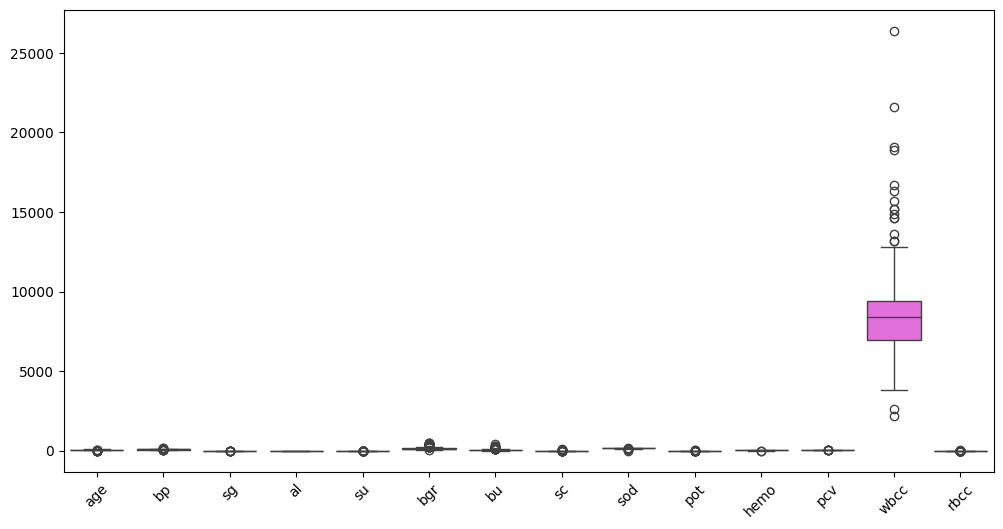

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_kidneydiseases)
plt.xticks(rotation=45)
plt.show()

In [33]:
kidney_skewed_cols = ['age', 'bp', 'sg' , 'al' , 'su' , 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

for col in kidney_skewed_cols:
    if (df_kidneydiseases[col] > 0).all():
        df_kidneydiseases[col], _ = boxcox(df_kidneydiseases[col])
    else:
        from sklearn.preprocessing import PowerTransformer
        pt = PowerTransformer(method='yeo-johnson')
        df_kidneydiseases[col] = pt.fit_transform(df_kidneydiseases[[col]])

print(df_kidneydiseases[kidney_skewed_cols].skew())

age    -0.233243
bp     -0.018854
sg     -0.032458
al      0.248978
su      1.105646
bgr    -0.134214
bu     -0.025444
sc      0.100012
sod     0.091238
pot    -0.395817
hemo   -0.058426
pcv    -0.050693
wbcc    0.036590
rbcc    0.070667
dtype: float64


In [34]:
df_kidneydiseases['su'] = np.log1p(df_kidneydiseases['su'])
print(df_kidneydiseases['su'].skew())

1.0321124188823934


In [35]:
# cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'] rbc_normal

df_kidneydiseases = pd.get_dummies(df_kidneydiseases, columns=['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], drop_first=True)

In [36]:
print(df_kidneydiseases.dtypes)

age            float64
bp             float64
sg             float64
al             float64
su             float64
bgr            float64
bu             float64
sc             float64
sod            float64
pot            float64
hemo           float64
pcv            float64
wbcc           float64
rbcc           float64
class           object
rbc_normal        bool
pc_normal         bool
pcc_present       bool
ba_present        bool
htn_yes           bool
dm_no             bool
dm_yes            bool
cad_yes           bool
appet_poor        bool
pe_yes            bool
ane_yes           bool
dtype: object


In [37]:
X = df_kidneydiseases.drop(columns=['class'])
y = df_kidneydiseases['class']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)

print("Logistic Regression Accuracy:", lr_accuracy)

Logistic Regression Accuracy: 0.65


In [40]:
# decision trees
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {dt_accuracy:.4f}')

Decision Tree Accuracy: 0.9800


In [41]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy:.4f}')


Random Forest Accuracy: 1.0000


In [42]:
#svm
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {svm_accuracy:.4f}')

SVM Accuracy: 0.7800
